In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
low_memory=False
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
filename = r'./covid19-brazil.csv'
df = pd.read_csv(filename, delimiter=',', encoding='UTF-8')

/home/joao/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
df.dropna(how='all',axis=0, inplace=True)
df.shape

(488284, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488284 entries, 0 to 488283
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   regiao                 488284 non-null  object 
 1   estado                 488161 non-null  object 
 2   municipio              482908 non-null  object 
 3   coduf                  488284 non-null  int64  
 4   codmun                 484840 non-null  float64
 5   codRegiaoSaude         482908 non-null  float64
 6   nomeRegiaoSaude        482908 non-null  object 
 7   data                   488284 non-null  object 
 8   semanaEpi              488284 non-null  int64  
 9   populacaoTCU2019       486352 non-null  object 
 10  casosAcumulado         488284 non-null  int64  
 11  casosNovos             488284 non-null  int64  
 12  obitosAcumulado        488284 non-null  int64  
 13  obitosNovos            488284 non-null  int64  
 14  Recuperadosnovos       69 non-null  

In [5]:
df = pd.DataFrame(data={
    "regiao": df["regiao"],
    "estado": df["estado"],
    "municipio": df["municipio"],
    "data": df["data"],
    "casos": df["casosAcumulado"],
    "obitos": df["obitosAcumulado"]
})
df.sample(10)

,regiao,estado,municipio,data,casos,obitos
220189,Sudeste,MG,Coimbra,6/20/2020,3,0
355113,Sul,PR,Agudos do Sul,5/11/2020,4,0
202312,Nordeste,BA,Valente,5/22/2020,28,1
164098,Nordeste,SE,Moita Bonita,4/18/2020,0,0
305505,Sudeste,SP,Braúna,4/21/2020,0,0
193242,Nordeste,BA,Pintadas,3/29/2020,0,0
166893,Nordeste,SE,São Miguel do Aleixo,5/23/2020,2,0
408458,Sul,SC,São Carlos,4/26/2020,0,0
309860,Sudeste,SP,Colômbia,5/22/2020,0,0
398816,Sul,SC,Jaguaruna,5/14/2020,7,0


In [6]:
dates = [
    '2/25/2020', '2/29/2020',
    '3/1/2020', '3/31/2020',
    '4/1/2020', '4/30/2020',
    '5/1/2020', '5/31/2020',
    '6/1/2020', '6/26/2020'
]
df = df.loc[df["data"].isin(dates)]

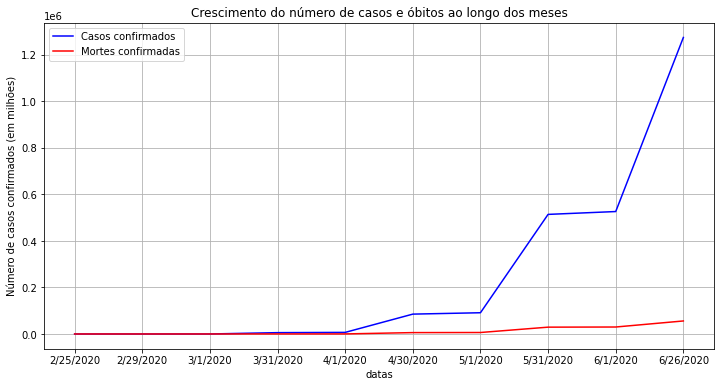

In [7]:
national = df.query('regiao == "Brasil"')

plt.figure(figsize=(12, 6))
plt.title("Crescimento do número de casos e óbitos ao longo dos meses")
plt.ylabel("Número de casos confirmados (em milhões)")
plt.xlabel("datas")
plt.grid(True)
dates = national["data"]
cases = national["casos"]
deaths = national["obitos"]
plt.plot(dates, cases, label="Casos confirmados", color="blue")
plt.plot(dates, deaths, label="Mortes confirmadas", color="red")
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

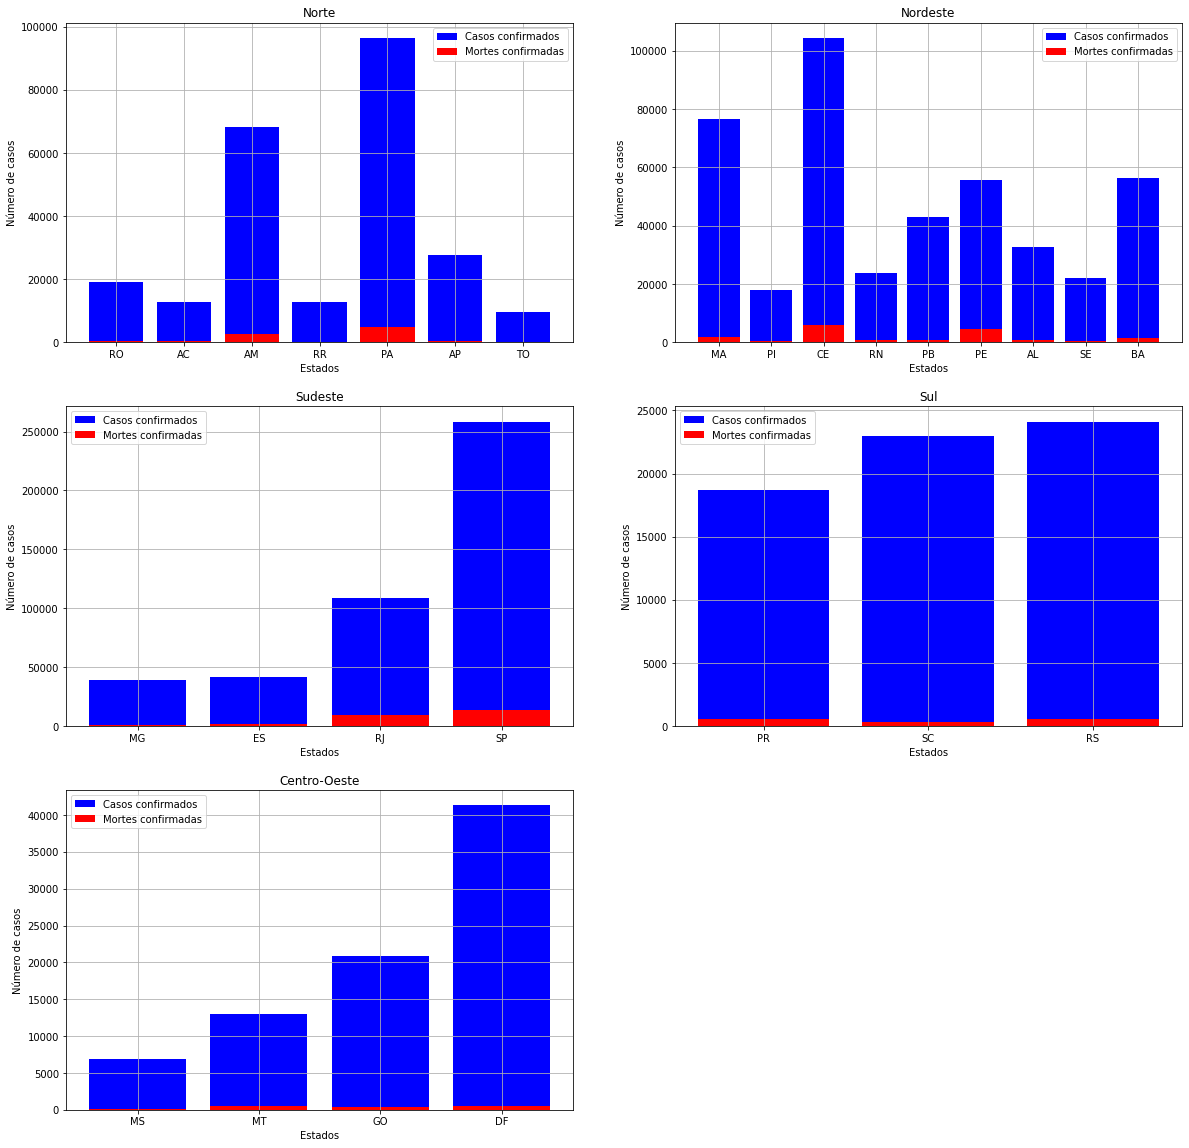

In [8]:
plt.figure()

regions = df.query('regiao != "Brasil"')["regiao"].unique()
pos = 321
plt.figure(figsize=(20, 20))
for i in range(len(regions)):
    region = regions[i]
    dataframe = df.query(f'regiao == "{regions[i]}"')
    plt.subplot(pos)
    plt.title(region)
    plt.ylabel("Número de casos")
    plt.xlabel("Estados")
    plt.grid(True)
    states = dataframe["estado"]
    cases = dataframe["casos"]
    deaths = dataframe["obitos"]
    plt.bar(states, cases, label="Casos confirmados", color="blue")
    plt.bar(states, deaths, label="Mortes confirmadas", color="red")
    plt.legend()
    pos += 1
    
plt.show()

In [24]:
geolocator = Nominatim(user_agent="Covid 19 data analysis")
states = df.dropna()
arr_states = states["estado"].unique()
desc = []
latitudes = []
longitudes = []
for i in range(len(arr_states)):
    state_df = states.query(f'estado == "{arr_states[i]}"')
    cases = state_df["casos"]
    deaths = state_df["obitos"]
    desc.append(f"{arr_states[i]}\nCasos confirmados: {max(cases)}\nMortes: {max(deaths)}\n")
    location = geolocator.geocode(f"{arr_states[i]} - Brazil")
    latitudes.append(f"{location.latitude}")
    longitudes.append(f"{location.longitude}")

for s in desc: print(s)

RO
Casos confirmados: 12041
Mortes: 338

AC
Casos confirmados: 6498
Mortes: 243

AM
Casos confirmados: 26783
Mortes: 1747

RR
Casos confirmados: 9705
Mortes: 217

PA
Casos confirmados: 18620
Mortes: 1883

AP
Casos confirmados: 12885
Mortes: 245

TO
Casos confirmados: 3655
Mortes: 53

MA
Casos confirmados: 12755
Mortes: 771

PI
Casos confirmados: 6899
Mortes: 324

CE
Casos confirmados: 34580
Mortes: 3235

RN
Casos confirmados: 9234
Mortes: 343

PB
Casos confirmados: 12015
Mortes: 296

PE
Casos confirmados: 20275
Mortes: 1781

AL
Casos confirmados: 14236
Mortes: 569

SE
Casos confirmados: 12849
Mortes: 247

BA
Casos confirmados: 27713
Mortes: 1046

MG
Casos confirmados: 5827
Mortes: 109

ES
Casos confirmados: 6926
Mortes: 289

RJ
Casos confirmados: 55152
Mortes: 6264

SP
Casos confirmados: 121163
Mortes: 6880

PR
Casos confirmados: 3208
Mortes: 128

SC
Casos confirmados: 2397
Mortes: 35

RS
Casos confirmados: 2384
Mortes: 76

MS
Casos confirmados: 2335
Mortes: 19

MT
Casos confirmados: 3

In [36]:
mapbox_access_token = open(".mapbox_token").read()

fig = go.Figure(go.Scattermapbox(
        lat=latitudes,
        lon=longitudes,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=descFramework para cel é React?

    ))

fig.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=-10.3333333,
            lon=-53.2
        ),
        pitch=0,
        zoom=3
    ),
)

fig.show()